In [2]:
from pennylane import numpy as np
sym = ["O", "O","N", "C", "C", "H","H","H","H","H"]
x = np.array([-2.4677,  0.9906,  -0.0151,
-0.7252, -1.9381, -0.0074,
3.4422, -0.1218,  -0.1347,
1.0912,  1.1800,  0.0118,
1.8146,  1.8633,  -1.1974,
3.9811,  0.1337, -0.4000,
4.2389,  0.3622,  0.5319,
2.9907, -0.9121,  -0.0990,
2.3309,  2.7976, -1.3343,
0.6485,  1.0957, -1.7221])

In [ ]:
import pennylane as qml
from pennylane import qchem

H, qubits = qchem.molecular_hamiltonian(
    sym,
    coor,
    charge=0,
    mult=1,
    basis="sto-3g" ,
    active_electrons=4,
    active_orbitals=4,
)

print("Number of qubits required to perform quantum simulations: {:}".format(qubits))
print(H)

NameError: name 'coordinates' is not defined

In [1]:
import pickle
with open("hamiltoniandef.pkl", "wb") as f:
    pickle.dump(H, f)

NameError: name 'H' is not defined

In [3]:
import pickle
with open("C:\\Users\\lclai\\Desktop\\LDIG\\DB\\hamiltonians\\hamiltonian.pkl", "rb") as f:
    H = pickle.load(f)

# Nueva sección

In [5]:
!pip install pennylane==0.37 quimb

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----------- ---------------------------- 0.5/1.8 MB 3.4 MB/s eta 0:00:01
   ----------------- ---------------------- 0.8/1.8 MB 2.4 MB/s eta 0:00:01
   ----------------------------- ---------- 1.3/1.8 MB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/5.5 MB ? eta -:--:--
   - -------------------------------------- 0.3/5.5 MB ? eta -:--:--
   ----- ---------------------------------- 0.8/5.5 MB 1.6 MB/s eta 0:00:03
   ------- -------------------------------- 1.0/5.5 MB 1.9 MB/s eta 0:00:03
   --------- ------------------------------ 1.3/5.5 MB 1.7 MB/s eta 0:00:03
   ------------- -------------------------- 1.8/5.5 MB 1.8 MB/s eta 0:00:03
   --------------- ------------------------ 2.1/5.5 MB 1.7 MB/s eta 0:00:03
   ------------------ --------------------- 2.6/5.5 MB 1.7 MB/s eta 0:00:02
   ---------------------- -------


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import pennylane as qml
from pennylane import qchem
from pennylane import numpy as np
qubits = 8
kwargs_mps = {
    # Maximum bond dimension of the MPS
    "max_bond_dim": 50,
    # Cutoff parameter for the singular value decomposition
    "cutoff": np.finfo(np.complex128).eps,
    # Contraction strategy to apply gates
    "contract": "auto-mps",
}
#dev = qml.device("default.qubit", wires=qubits)
dev = qml.device("default.tensor", method="mps", **kwargs_mps)
from pennylane import numpy as np
theta = np.array(0.0, requires_grad = True)
electrons = 2
hf = qml.qchem.hf_state(electrons,qubits)
def circuit(param,wires):
    qml.BasisState(hf, wires = wires)
    qml.DoubleExcitation(param,wires = [0,1,2,3])

ImportError: cannot import name 'LinearCombination' from 'pennylane.ops' (c:\Users\lclai\miniconda3\envs\house\lib\site-packages\pennylane\ops\__init__.py)

In [ ]:
#opt = qml.GradientDescentOptimizer(stepsize=0.2)
opt = qml.AdamOptimizer(stepsize=0.1)

In [12]:
!pip install pyscf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.7/48.7 MB 16.1 MB/s eta 0:00:00


In [ ]:
from pennylane.qchem import import_state
from pyscf import gto, scf, ci

from pyscf import gto, scf

symbols = ["N", "H", "H", "H"]
coordinates = np.array([
    [0, 0, 0],
    [0, -0.9366, -0.3816],
    [0.8121, 0.4689, -0.3816],
    [-0.8121, 0.4689, -0.3816]
])

mol = gto.M(
    atom=[(symbols[i], coordinates[i]) for i in range(len(symbols))],
    basis='sto-3g',
    spin=0,  # Espín total 0
    charge=0  # Carga total 0
)
myhf = scf.RHF(mol).run()
myci = ci.CISD(myhf).run()
wf_cisd = import_state(myci, tol=1e-1)

In [ ]:
@qml.qnode(dev, interface = "autograd")
def cost_fn(param):
    circuit(param,wires = range(qubits))
    return qml.expval(H)
# store the values of the cost function
energy = [cost_fn(theta)]

# store the values of the circuit parameter
angle = [theta]

max_iterations = 5
conv_tol = 1e-06

energy = []
angle = []

for n in range(max_iterations):
    theta, prev_energy = opt.step_and_cost(cost_fn, theta, initial_state=wf_cisd)

    if len(energy) > 5:  # Mantén solo los últimos 5 valores
        energy.pop(0)
        angle.pop(0)

    energy.append(prev_energy)
    angle.append(theta)


print("\n" f"Final value of the ground-state energy = {energy[-1]:.8f} Ha")
print("\n" f"Optimal value of the circuit parameter = {angle[-1]:.4f}")
energy_amoni = energy[-1]
print(energy_amoni)

/usr/local/lib/python3.10/dist-packages/pennylane/ops/qubit/hamiltonian.py:257: PennyLaneDeprecationWarning: Using 'qml.ops.Hamiltonian' with new operator arithmetic is deprecated. Instead, use 'qml.Hamiltonian'. Please visit https://docs.pennylane.ai/en/stable/news/new_opmath.html for more information and help troubleshooting.
  warn(
/usr/local/lib/python3.10/dist-packages/pennylane/devices/default_tensor.py:678: ComplexWarning: Casting complex values to real discards the imaginary part
  str(int(b)) for b in op.parameters[0].astype(self._c_dtype)


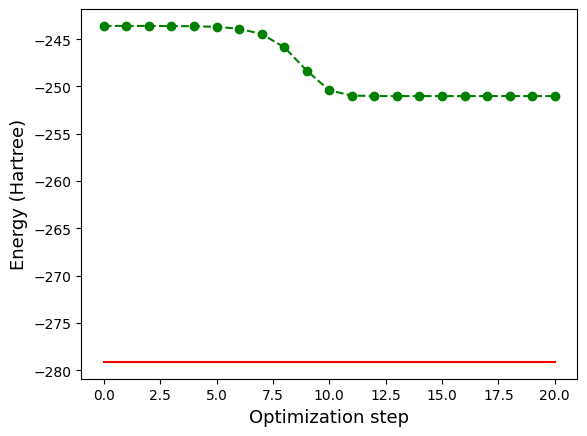

In [ ]:
import matplotlib.pyplot as plt

E_fci = -279.11
plt.plot(range(n + 2), energy, "go", ls="dashed")
plt.plot(range(n + 2), np.full(n + 2, E_fci), color="red")
plt.xlabel("Optimization step", fontsize=13)
plt.ylabel("Energy (Hartree)", fontsize=13)

plt.show()

Text(0, 0.5, 'Gate parameter $\\theta$ (rad)')

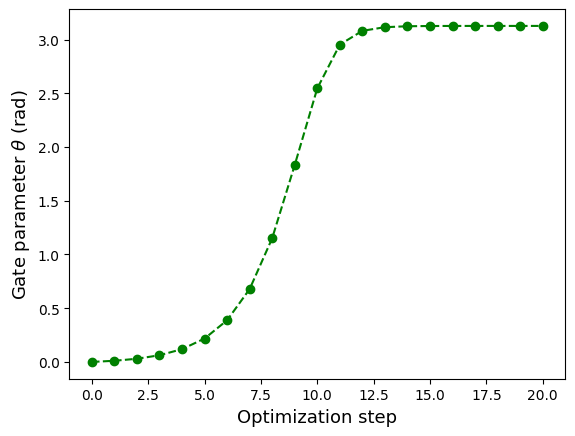

In [ ]:
plt.plot(range(n + 2), angle, "go", ls="dashed")
plt.xlabel("Optimization step", fontsize=13)
plt.ylabel("Gate parameter $\\theta$ (rad)", fontsize=13)

COORDINATES

In [ ]:
hf = qml.qchem.hf_state(electrons=2, orbitals=4)
print(hf)

[1 1 0 0]


In [ ]:
num_wires = 8
dev = qml.device("lightning.qubit", wires=num_wires)
@qml.qnode(dev, interface="autograd")
def circuit(params, obs, wires):
    qml.BasisState(hf, wires=wires)
    qml.DoubleExcitation(params,wires = [0,1,2,3])
    return qml.expval(obs)

In [ ]:
def H(x):
    return qml.qchem.molecular_hamiltonian(sym, x)[0]


In [ ]:
def cost(params, x):
    hamiltonian = H(x)
    return circuit(params, obs=hamiltonian, wires=range(num_wires))

In [ ]:
def finite_diff(f, x, delta=0.01):
    """Compute the central-difference finite difference of a function"""
    gradient = []

    for i in range(len(x)):
        shift = np.zeros_like(x)
        shift[i] += 0.5 * delta
        res = (f(x + shift) - f(x - shift)) * delta**-1
        gradient.append(res)

    return gradient


def grad_x(params, x):
    grad_h = finite_diff(H, x)
    grad = [circuit(params, obs=obs, wires=range(num_wires)) for obs in grad_h]
    return np.array(grad)

In [ ]:
opt_theta = qml.GradientDescentOptimizer(stepsize=0.4)
opt_x = qml.GradientDescentOptimizer(stepsize=0.8)

In [ ]:
from pennylane import numpy as np
theta = np.array([0.0, 0.0], requires_grad=True)

In [ ]:
from functools import partial

# store the values of the cost function
energy = []

# store the values of the bond length
bond_length = []

# Factor to convert from Bohrs to Angstroms
bohr_angs = 0.529177210903

for n in range(5):

    # Optimize the circuit parameters
    theta.requires_grad = True
    x.requires_grad = False
    theta, _ = opt_theta.step(cost, theta, x)

    # Optimize the nuclear coordinates
    x.requires_grad = True
    theta.requires_grad = False
    _, x = opt_x.step(cost, theta, x, grad_fn=grad_x)

    energy.append(cost(theta, x))
    bond_length.append(np.linalg.norm(x[0:3] - x[3:6]) * bohr_angs)

    if n % 4 == 0:
        print(f"Step = {n},  E = {energy[-1]:.8f} Ha,  bond length = {bond_length[-1]:.5f} A")

    # Check maximum component of the nuclear gradient
    if np.max(grad_x(theta, x)) <= 1e-05:
        break

print("\n" f"Final value of the ground-state energy = {energy[-1]:.8f} Ha")
print("\n" "Ground-state equilibrium geometry")
print("%s %4s %8s %8s" % ("symbol", "x", "y", "z"))
for i, atom in enumerate(sym):
    print(f"  {atom}    {x[3 * i]:.4f}   {x[3 * i + 1]:.4f}   {x[3 * i + 2]:.4f}")